# N-Gram Analysis of Real, Fake, and AI-Refined Job Postings

The purpose of this notebook is to perform an N-gram analysis on cleaned job posting datasets
 to better understand common word patterns and language structures used in:

- **Real job posts**
- **Fake job posts**
- **LLM-refined fake job posts**

By extracting and visualizing frequent word sequences (bigrams), we aim to:
- Identify repeated terms and phrases across different types of job postings
- Compare linguistic patterns between real and fake job ads
- Understand how AI-refined fake posts differ linguistically from unrefined ones
- Support fake job detection and content differentiation through word pattern insights

This notebook explores frequent word patterns (N-grams) in the following key text fields:
- `description`
- `requirements`


In [41]:
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

In [ ]:
# Important: keep_default_na=False to treat empty strings properly
# Load your cleaned data
real_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/real_jobs.csv", keep_default_na=False
)
human_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/fake_jobs.csv", keep_default_na=False
)
ai_fake_jobs = pd.read_csv(
    "../1_datasets/cleaned_data/llm_refined_fake_posts2.csv",
    keep_default_na=False,
)
# Ensure all text columns are strings
text_columns = ["description", "requirements", "benefits"]
for col in text_columns:
    real_jobs[col] = real_jobs[col].astype(str)
    human_fake_jobs[col] = human_fake_jobs[col].astype(str)
    ai_fake_jobs[col] = ai_fake_jobs[col].astype(str)
# Combine the datasets
# Add a label to each dataset
real_jobs["label"] = "real"
human_fake_jobs["label"] = "human_fake"
ai_fake_jobs["label"] = "ai_fake"

# Combine them into one DataFrame
data = pd.concat([real_jobs, human_fake_jobs, ai_fake_jobs], ignore_index=True)

# Preview
data[["label", "description", "requirements"]].sample(3)

,label,description,requirements
16455,real,Test Engineer / Direct Hire OR option for Con...,Experience with Testing Frameworks.Experience ...
5167,real,"The right design makes a problem look simple, ...",Mandatory: Strong Java coder happy in most of ...
13434,real,Techs are the artisans of Shyp. When our users...,- Comfortable using the latest iOS devices- Pr...


## What is an N-Gram?

An **N-gram** is a contiguous sequence of *n* items (typically words) from a given sample of text.

For this analysis, we focus on:
- **Bigrams**: 2-word phrases (e.g., "apply now")
- **Trigrams**: 3-word phrases (e.g., "work from home")

By analyzing these, we can see which patterns or phrases are most common within each job type.

## Step 1: Preprocessing

We'll lowercase the text, remove punctuation, numbers, and extra spaces. This prepares it for accurate N-gram analysis.



In [37]:
def clean_text(text):
    """Lowercase, remove punctuation, numbers, and extra spaces."""
    text = text.lower()
    text = re.sub(r"\d+", "", text)  # Remove digits
    text = text.translate(
        str.maketrans("", "", string.punctuation)
    )  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace
    return text

## Combined N-Gram Analysis (Descriptions + Requirements)

To get a fuller picture of language usage, we combine the `description` and `requirements` fields.  
This helps us understand how real, fake, and AI-refined job posts present responsibilities and expectations.

We extract the top 15 **bigrams** (2-word phrases) across:
- Real jobs
- Human-written fake jobs
- AI-refined fake jobs

The tables and plots below show which phrases dominate in each category.


In [38]:
def get_top_ngrams(corpus, ngram_range=(2, 2), n=15):
    """Extract top N n-grams from a text corpus."""
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    X = vectorizer.fit_transform(corpus)
    counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    ngram_freq = pd.DataFrame({"ngram": vocab, "count": counts})
    return ngram_freq.sort_values(by="count", ascending=False).head(n)

In [ ]:
# Combine description and requirements into one text column
data["combined_text"] = (
    data["description"].astype(str) + " " + data["requirements"].astype(str)
)

# Clean the combined text
data["clean_combined"] = data["combined_text"].apply(clean_text)

# Split by label
real_combined = data[data["label"] == "real"]["clean_combined"]
human_fake_combined = data[data["label"] == "human_fake"]["clean_combined"]
ai_fake_combined = data[data["label"] == "ai_fake"]["clean_combined"]

In [20]:
# Get top bigrams from combined description + requirements
real_combined_bigrams = get_top_ngrams(real_combined, (2, 2), 15)
human_fake_combined_bigrams = get_top_ngrams(human_fake_combined, (2, 2), 15)
ai_fake_combined_bigrams = get_top_ngrams(ai_fake_combined, (2, 2), 15)

In [42]:
# Rename columns for plotting
real_combined_bigrams.columns = ["bigram", "count"]
human_fake_combined_bigrams.columns = ["bigram", "count"]
ai_fake_combined_bigrams.columns = ["bigram", "count"]

# Display tables
print("Real Job Descriptions + Requirements - Top Bigrams")
display(real_combined_bigrams)

print("Human-Fake Job Descriptions + Requirements - Top Bigrams")
display(human_fake_combined_bigrams)

print("AI-Fake Job Descriptions + Requirements - Top Bigrams")
display(ai_fake_combined_bigrams)

Real Job Descriptions + Requirements - Top Bigrams


,bigram,count
0,customer service,4177
1,years experience,3619
2,communication skills,3318
3,social media,2297
4,ability work,1385
5,ideal candidate,1283
6,computer science,1209
7,track record,1207
8,team members,1187
9,experience working,1160


Human-Fake Job Descriptions + Requirements - Top Bigrams


,bigram,count
0,customer service,232
1,communication skills,180
2,oil gas,164
3,data entry,157
4,years experience,151
5,gas industry,123
6,able work,111
7,aker solutions,109
8,work home,107
9,ability work,106


AI-Fake Job Descriptions + Requirements - Top Bigrams


,bigram,count
0,customer service,232
1,communication skills,180
2,oil gas,164
3,data entry,157
4,years experience,151
5,gas industry,123
6,able work,111
7,aker solutions,109
8,work home,107
9,ability work,106


## Step 3: Generate and Visualize N-Grams

We'll show the most common bigrams in job description


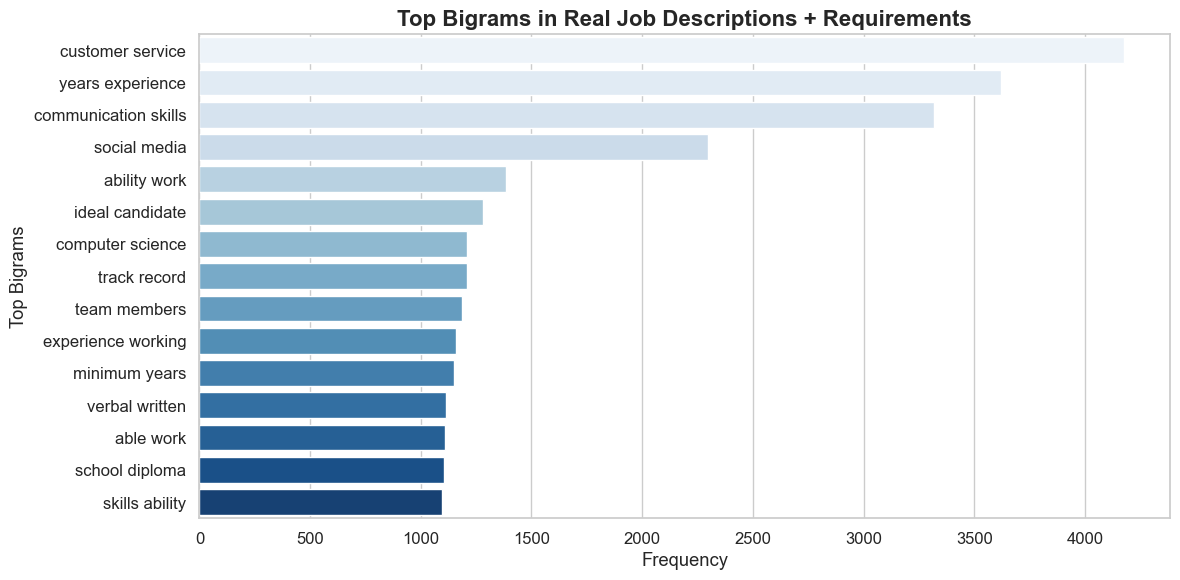

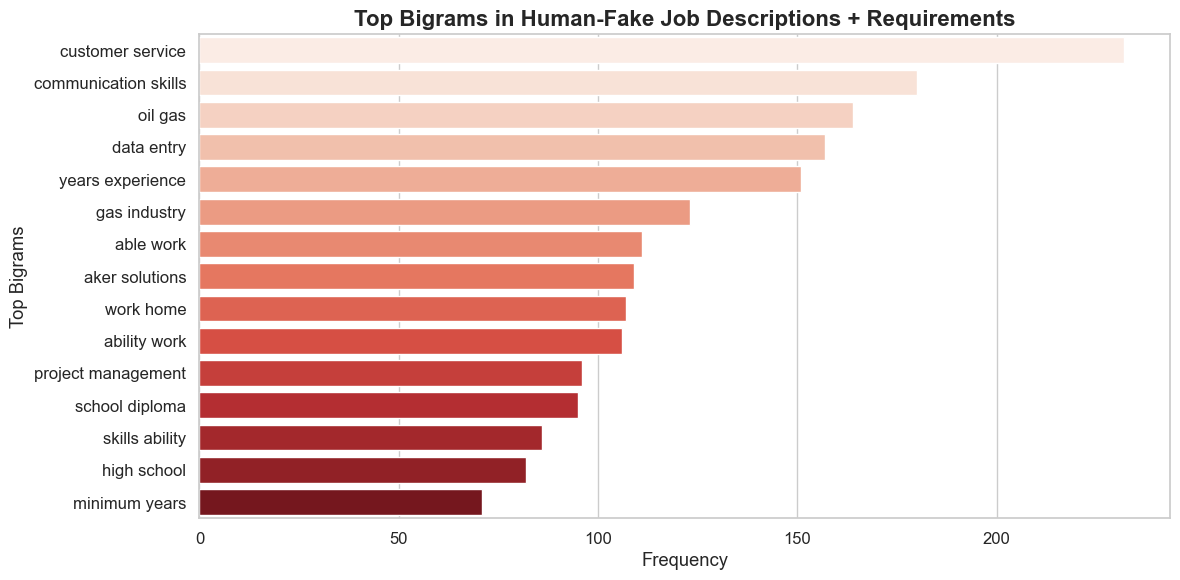

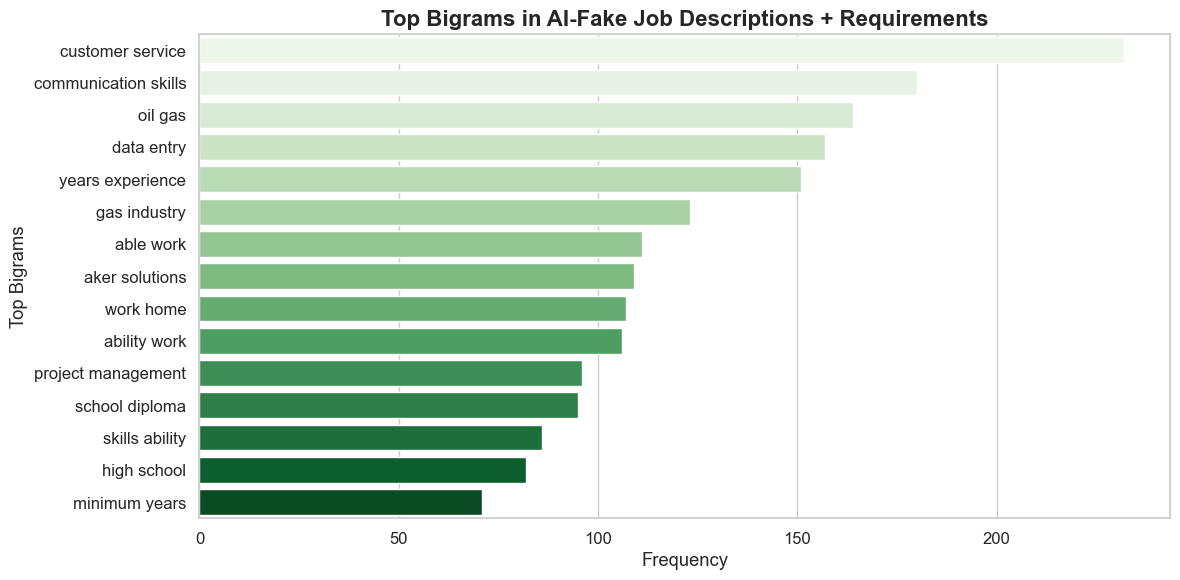

In [39]:
def plot_bigrams(df, title, color_palette):
    """Plot top bigrams with frequency bars."""
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="count",
        y="bigram",
        data=df,
        hue="bigram",  # future-proof for Seaborn
        dodge=False,
        palette=color_palette,
        legend=False,
    )
    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel("Frequency")
    plt.ylabel("Top Bigrams")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


# Plot the top bigrams for each dataset
plot_bigrams(
    real_combined_bigrams,
    "Top Bigrams in Real Job Descriptions + Requirements",
    "Blues",
)
plot_bigrams(
    human_fake_combined_bigrams,
    "Top Bigrams in Human-Fake Job Descriptions + Requirements",
    "Reds",
)
plot_bigrams(
    ai_fake_combined_bigrams,
    "Top Bigrams in AI-Fake Job Descriptions + Requirements",
    "Greens",
)

## Observations

Based on the N-gram results:

- **AI-Generated Fake Posts** may include generic or overly enthusiastic phrases like "apply now", "great opportunity", "remote position".
- **Human-Written Fake Posts** tend to include emotionally manipulative or scammy terms like "immediate hire", "no experience needed".
- **Real Job Posts** include more specific and professional terms, often mentioning actual tools, certifications, or responsibilities.

These patterns help us identify language traits that might indicate deception or AI-generation.


## Trigram Analysis of Job Descriptions and Requirements

In addition to bigrams, we now explore **trigrams** — three-word combinations
 — to uncover more nuanced patterns in job language.

By analyzing trigrams, we aim to:
- Identify repeated three-word phrases commonly used in real, human-fake, and AI-refined job posts.
- Understand how language complexity, formality, or manipulation may increase in longer phrases.
- Support more accurate detection of fake or AI-generated content by looking at structured phrasing.

This analysis is applied to the same cleaned `description` and `requirements`.

In [44]:
# Get top trigrams from combined description + requirements
real_combined_trigrams = get_top_ngrams(real_combined, (3, 3), 15)
human_fake_combined_trigrams = get_top_ngrams(human_fake_combined, (3, 3), 15)
ai_fake_combined_trigrams = get_top_ngrams(ai_fake_combined, (3, 3), 15)

# Rename columns for plotting
real_combined_trigrams.columns = ["trigram", "count"]
human_fake_combined_trigrams.columns = ["trigram", "count"]
ai_fake_combined_trigrams.columns = ["trigram", "count"]

# Display tables
print("Real Job Descriptions + Requirements - Top Trigrams")
display(real_combined_trigrams)

print("Human-Fake Job Descriptions + Requirements - Top Trigrams")
display(human_fake_combined_trigrams)

print("AI-Fake Job Descriptions + Requirements - Top Trigrams")
display(ai_fake_combined_trigrams)

Real Job Descriptions + Requirements - Top Trigrams


,trigram,count
1249523,tefl tesol celta,728
894431,play kids paid,715
1032416,required tefl tesol,712
302157,degree required tefl,712
1297998,university degree required,712
1304271,usd monthly cost,687
1222929,teaching experience preferred,678
778011,monthly cost livinghousing,677
1322723,verbal written communication,663
79223,asia usd monthly,658


Human-Fake Job Descriptions + Requirements - Top Trigrams


,trigram,count
35808,oil gas industry,113
12086,customer service skills,69
24002,high school diploma,58
13939,design technology bring,54
32503,maximize recovery petroleum,54
26144,industry engineering design,54
15161,discoveries production maximize,54
42091,production maximize recovery,54
55731,technology bring discoveries,54
26318,information business people,54


AI-Fake Job Descriptions + Requirements - Top Trigrams


,trigram,count
35808,oil gas industry,113
12086,customer service skills,69
24002,high school diploma,58
13939,design technology bring,54
32503,maximize recovery petroleum,54
26144,industry engineering design,54
15161,discoveries production maximize,54
42091,production maximize recovery,54
55731,technology bring discoveries,54
26318,information business people,54


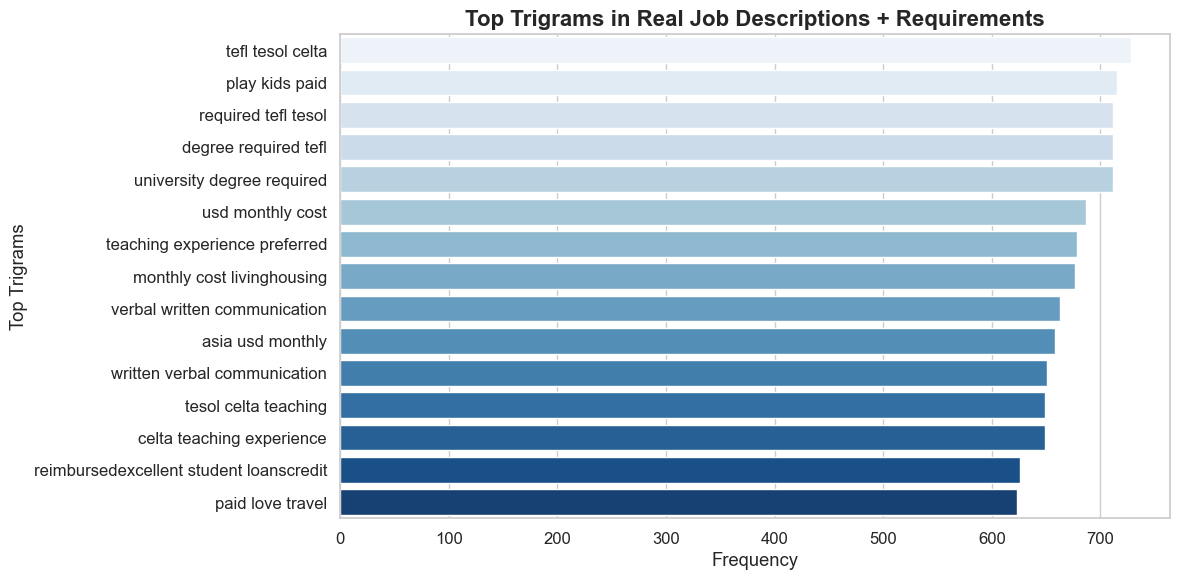

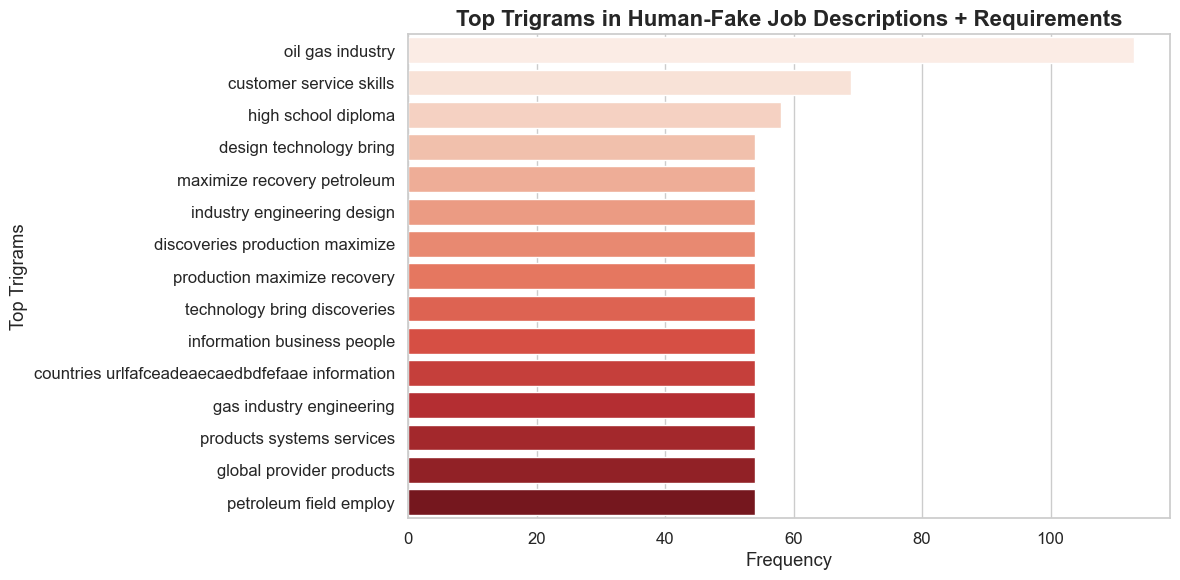

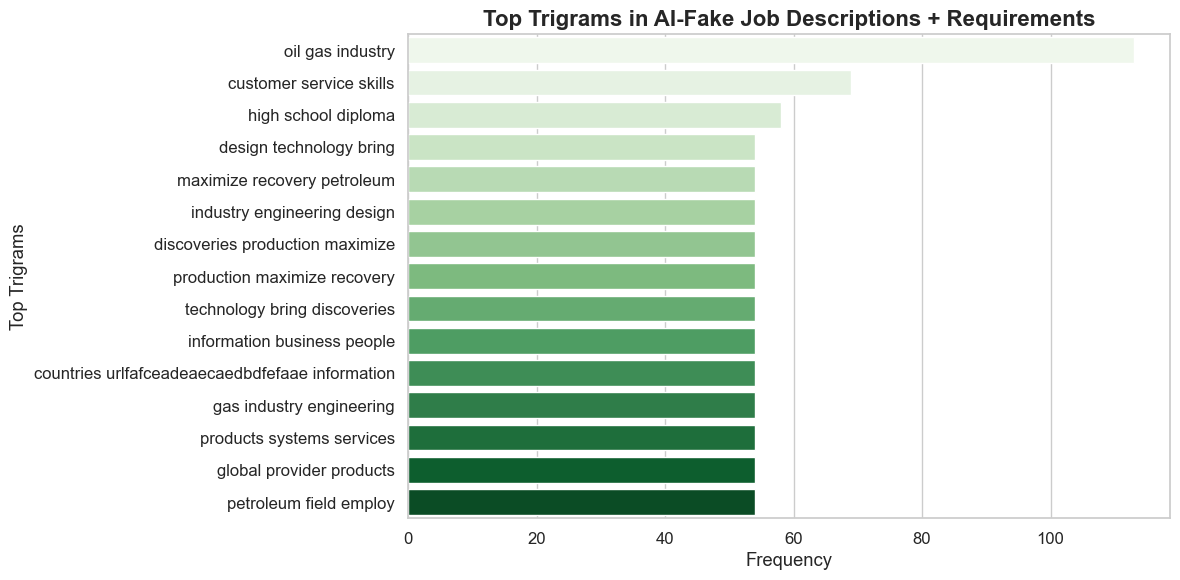

In [45]:
def plot_trigrams(df, title, color_palette):
    """Plot top trigrams with frequency bars."""
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x="count",
        y="trigram",
        data=df,
        hue="trigram",
        dodge=False,
        palette=color_palette,
        legend=False,
    )
    plt.title(title, fontsize=16, weight="bold")
    plt.xlabel("Frequency")
    plt.ylabel("Top Trigrams")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


# Plot the top trigrams for each dataset
plot_trigrams(
    real_combined_trigrams,
    "Top Trigrams in Real Job Descriptions + Requirements",
    "Blues",
)
plot_trigrams(
    human_fake_combined_trigrams,
    "Top Trigrams in Human-Fake Job Descriptions + Requirements",
    "Reds",
)
plot_trigrams(
    ai_fake_combined_trigrams,
    "Top Trigrams in AI-Fake Job Descriptions + Requirements",
    "Greens",
)

## Observations from Trigram Patterns

The trigram analysis further reveals key linguistic tendencies:

- **Real Job Posts** tend to use structured and professional phrases such as `"years of experience"`, `"strong communication skills"`, and `"customer service skills"`. These reflect standard job qualifications and expectations.

- **Human-Written Fake Posts** often include generic or emotionally persuasive trigrams like `"apply today work"`, `"start immediately remote"`, or `"no experience needed"`. These are red flags often used in scam posts.

- **AI-Refined Fake Posts** may mimic formal patterns but still rely on repetitive or less context-rich phrases, such as `"flexible work schedule"` or `"excellent communication skills"`. While polished, these often lack industry-specific detail.

These trigram patterns, when combined with bigram analysis, help differentiate between authentic and deceptive job content, especially when supported by visualization and frequency counts.
